In [1]:
from pathlib import Path
import re
import time
import ast
from datetime import datetime
from dateutil import relativedelta

import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from util import data_helper
from projects.credit_card import model_config
from util import bm_helper, lgbm_helper, report_helper, metric_helper

import config

%load_ext autoreload
%autoreload 2

In [25]:
fp_grid = Path(config.ROOT_DIR, 'data', model_config.prefix, 'grid.csv')
df_grid = pd.read_csv(fp_grid, index_col=None)

fp_bo = Path(config.ROOT_DIR, 'data', model_config.prefix, 'bo.csv')
df_bo = pd.read_csv(fp_bo, index_col=None)
df_bo = df_bo.sort_values(by=['auc_valid', 'auc_train'], ascending=[False, False]).reset_index(drop=True)

df_bo['dict_params'] = df_bo['params'].apply(lambda x: ast.literal_eval(x))
for k in df_bo['dict_params'].iloc[0]:
    print(k)
    df_bo[k] = df_bo['dict_params'].apply(lambda x: x[k])

learning_rate
max_depth
min_child_samples
num_leaves


<AxesSubplot:>

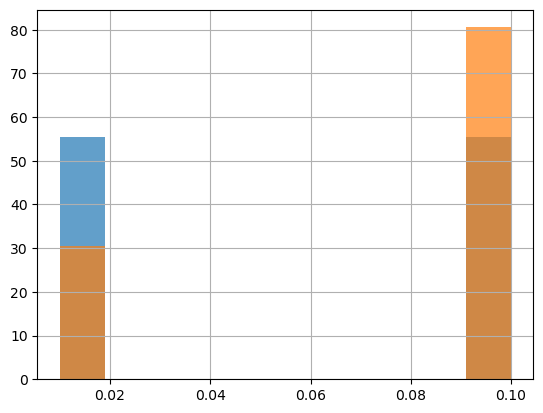

In [26]:
df_grid['learning_rate'].hist(density=True, alpha = 0.7)
df_bo['learning_rate'].hist(density=True, alpha = 0.7)

<AxesSubplot:>

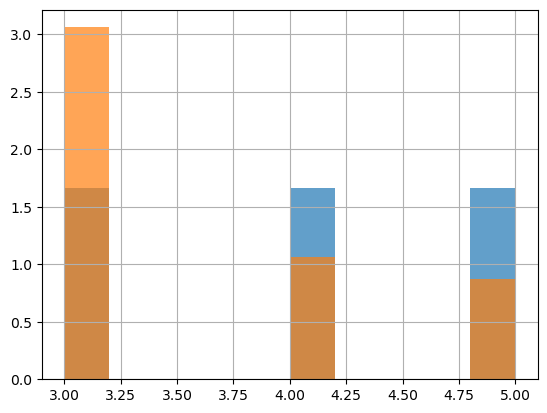

In [27]:
df_grid['max_depth'].hist(density=True, alpha = 0.7)
df_bo['max_depth'].hist(density=True, alpha = 0.7)

<AxesSubplot:>

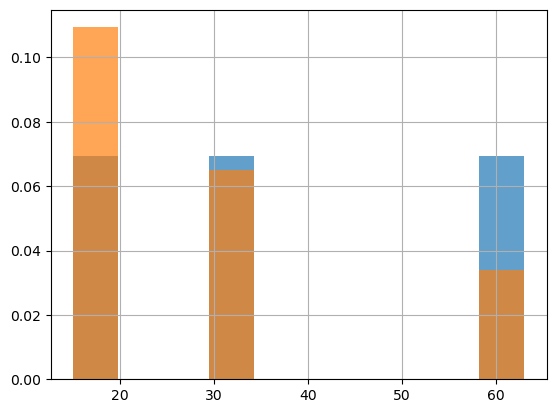

In [28]:
df_grid['num_leaves'].hist(density=True, alpha = 0.7)
df_bo['num_leaves'].hist(density=True, alpha = 0.7)

<AxesSubplot:>

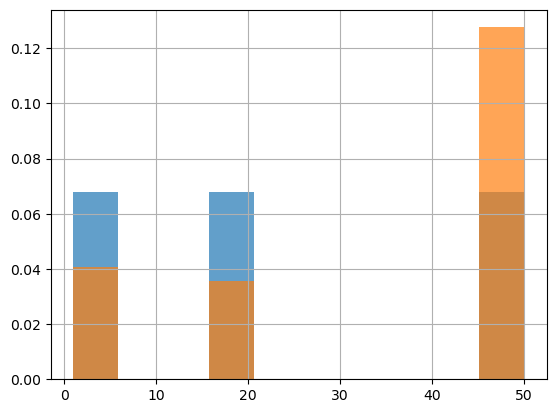

In [29]:
df_grid['min_child_samples'].hist(density=True, alpha = 0.7)
df_bo['min_child_samples'].hist(density=True, alpha = 0.7)